# Principal Component Analysis of Alaska Glaciers

## Objective
This notebook explores the correlation between measurements of a group of glaciers from Alaska using Principal Component Analysis (PCA). We analyze multiple glacier attributes including area, mean elevation, slope, aspect, surge type, terminus type, and maximum length to understand which variables drive the most variation in the dataset.

## Dataset
The data comes from the Randolph Glacier Inventory (RGI version 7.0) for the Alaska region, containing various morphological and geometric properties of glaciers.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns## Data Loading and Exploration

## Data Loading and Exploration
First, we load the glacier attributes dataset and examine the available variables.

In [2]:
data = pd.read_csv("RGI2000-v7.0-G-01_alaska-attributes.csv")
print(data.head())

                    rgi_id  o1region o2region        glims_id  anlys_id  \
0  RGI2000-v7.0-G-01-00001         1    01-01  G204091E67414N    392889   
1  RGI2000-v7.0-G-01-00002         1    01-01  G204121E67419N    392890   
2  RGI2000-v7.0-G-01-00003         1    01-01  G204471E67431N    392897   
3  RGI2000-v7.0-G-01-00004         1    01-01  G204497E67431N    392899   
4  RGI2000-v7.0-G-01-00005         1    01-01  G204521E67429N    392901   

   subm_id             src_date      cenlon     cenlat  utm_zone  ...  \
0      624  2008-09-02T00:00:00 -155.909404  67.413726         5  ...   
1      624  2008-09-02T00:00:00 -155.879114  67.419232         5  ...   
2      624  2008-09-02T00:00:00 -155.530786  67.431484         5  ...   
3      624  2008-09-02T00:00:00 -155.501948  67.430514         5  ...   
4      624  2008-09-02T00:00:00 -155.478173  67.432873         5  ...   

     termlat     zmin_m     zmax_m     zmed_m    zmean_m  slope_deg  \
0  67.416034  1485.3176  1693.6235  154

## Variable Selection
We select key glacier measurements for our analysis:
- **area_km2**: Glacier area in square kilometers
- **zmean_m**: Mean elevation in meters
- **slope_deg**: Average slope in degrees
- **aspect_deg**: Aspect (orientation) in degrees
- **surge_type**: Type of surge behavior
- **term_type**: Terminus type (e.g., land-terminating, marine-terminating)
- **lmax_m**: Maximum length in meters

In [3]:
filtered_columns = data[['area_km2','zmean_m', 'slope_deg', 'aspect_deg',
                        'surge_type', 'term_type', 'lmax_m']]
print(filtered_columns.head())

   area_km2    zmean_m  slope_deg  aspect_deg  surge_type  term_type  lmax_m
0  0.239199  1553.9403  17.606613  342.330469           0          9     725
1  0.104641  1330.9150  19.846369  345.367012           0          9     484
2  0.216605  1437.2352  23.690063   13.467490           0          9    1099
3  0.252649  1249.0662  12.782562   42.854332           0          9     652
4  0.474716  1273.7834  17.148510  299.058193           0          9    1903


## Distribution of Variables
Visualization of the distribution of each variable to understand the data structure.

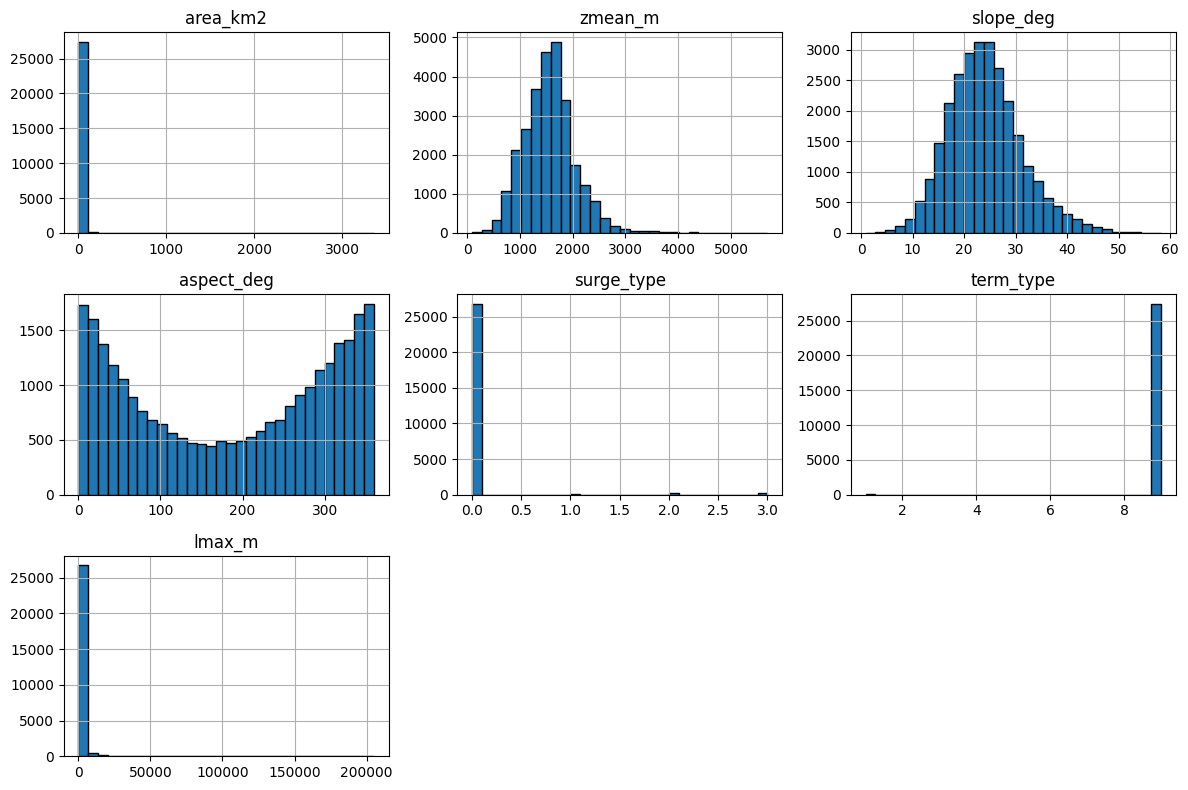

In [4]:
filtered_columns.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

## Correlation Analysis
Before performing PCA, we examine the correlation matrix to identify relationships between variables. Strong correlations suggest that variables capture similar information and that dimensionality reduction via PCA will be effective.

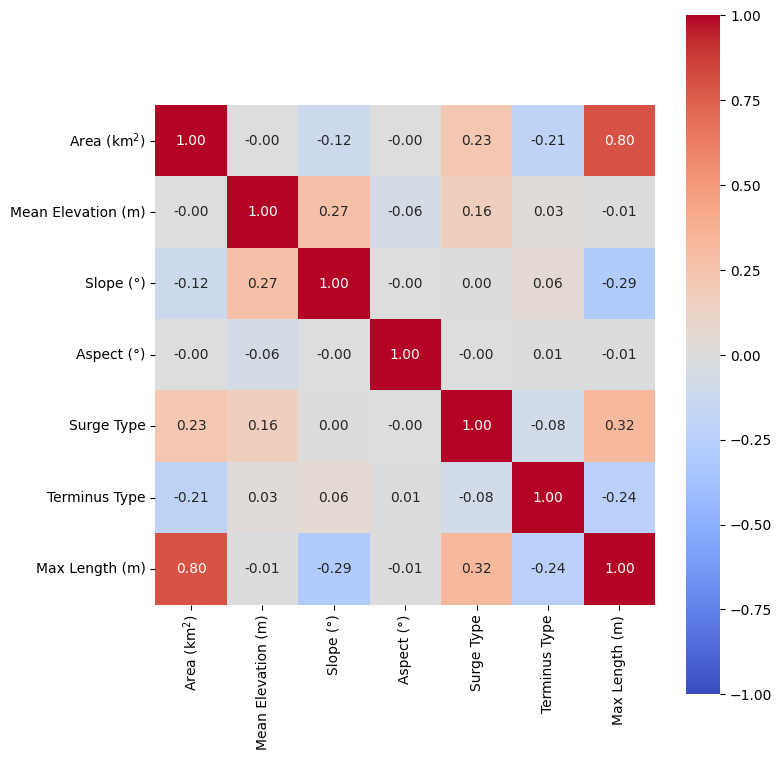

In [5]:
## Correlation coefficient matrix

corr_matrix = filtered_columns.corr()

# Create LaTeX formatted labels for axes
latex_labels = {
    'area_km2': r'Area (km$^2$)',
    'zmin_m': r'Min Elevation (m)',
    'zmax_m': r'Max Elevation (m)',
    'zmean_m': r'Mean Elevation (m)',
    'slope_deg': r'Slope (°)',
    'aspect_deg': r'Aspect (°)',
    'primeclass': r'Prime Class',
    'conn_lvl': r'Connectivity Level',
    'surge_type': r'Surge Type',
    'term_type': r'Terminus Type',
    'lmax_m': r'Max Length (m)'
}

latex_cols = [latex_labels[col] for col in filtered_columns.columns]

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            vmin=-1, vmax=1, center=0, ax=ax, square=True,
            xticklabels=latex_cols, yticklabels=latex_cols)
plt.tight_layout()
plt.show()

## Data Preprocessing
We remove missing values and center the data "scale" by subtracting the mean of each variable. Centering is essential for PCA as it ensures that the principal components capture variance rather than being influenced by the means.

In [6]:
glaciers = filtered_columns.dropna()
glacier_centered = glaciers - glaciers.mean()

## Performing PCA via Singular Value Decomposition (SVD)
We use SVD to decompose the centered data matrix and calculate the principal components. The explained variance ratio tells us what proportion of the total variance is captured by each component.

In [7]:
U, S, Vt = np.linalg.svd(glacier_centered, full_matrices=False)

# Project data onto principal components (scores)
pca_result = U * S

# Calculate explained variance ratio
explained_variance = (S ** 2) / (len(glacier_centered) - 1)
explained_variance_ratio = explained_variance / explained_variance.sum()

# What proportion is variance is explained by each PC?
print("Explained variance:")
for i, var in enumerate(explained_variance_ratio):
    print(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%)")

Explained variance:
  PC1: 0.9847 (98.47%)
  PC2: 0.0144 (1.44%)
  PC3: 0.0009 (0.09%)
  PC4: 0.0000 (0.00%)
  PC5: 0.0000 (0.00%)
  PC6: 0.0000 (0.00%)
  PC7: 0.0000 (0.00%)


## Scree plot

Using a scree plot we can visualize how much of the variation is explained by each Principal Component

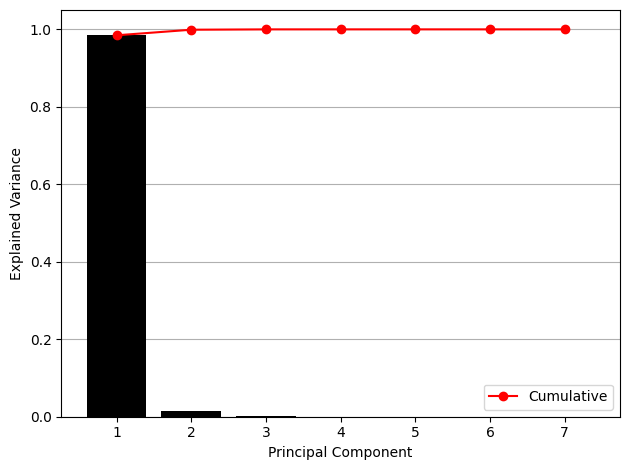

In [8]:
# We can also create a *scree* plot of pcs

fig, ax = plt.subplots()
ax.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, 
       color='black')
ax.plot(range(1, len(explained_variance_ratio)+1), np.cumsum(explained_variance_ratio), 
        'ro-', label='Cumulative')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
ax.set_xticks(range(1, len(explained_variance_ratio)+1))
ax.legend()
ax.grid(True, axis='y')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

## Key Finding: PC1 Dominates the Variance

**The first principal component (PC1) explains 98.47% of the total variance in the dataset.** This is an exceptionally high percentage, indicating that almost all of the variation among Alaska glaciers can be captured by a single dimension.

The scree plot below shows both the individual variance explained by each component (bars) and the cumulative variance (red line).

## Visualizing the Principal Components
This scatter plot shows the glacier samples projected onto the first two principal components. Data spread on the first axis with minimum variation on the second axis.

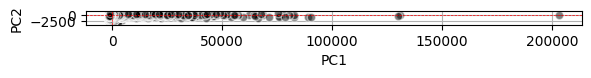

In [9]:
fig, ax = plt.subplots()
ax.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, color='k', edgecolors='w')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.axhline(y=0, color='r', linestyle='--', linewidth=0.5)
ax.axvline(x=0, color='r', linestyle='--', linewidth=0.5)
ax.set_aspect('equal')
ax.grid(True)
ax.set_axisbelow(True)
plt.show()

## Interpreting the Principal Components: Loadings

The loadings tell us how each original variable contributes to each principal component. High absolute loading values indicate strong influence on that component.

In [14]:
# What makes up each PC?

# Loadings (principal component vectors) are the rows of Vt
loadings = pd.DataFrame(Vt.T, index=glacier_centered.columns, columns=[f'PC{i+1}' for i in range(len(glacier_centered.columns))])
print("\nLoadings for PC1 and PC2:")
print(loadings[['PC1', 'PC2']])


Loadings for PC1 and PC2:
                 PC1       PC2
area_km2    0.008133 -0.000286
zmean_m    -0.001079 -0.999863
slope_deg  -0.000513 -0.003948
aspect_deg -0.000344  0.016040
surge_type  0.000029 -0.000123
term_type  -0.000021 -0.000020
lmax_m      0.999966 -0.001073



### PC1 is Driven by Maximum Length

The loading plots reveal which variables contribute most to each principal component. **Maximum length (lmax_m) has the highest loading on PC1**, explaining why PC1 captures so much variance. This suggests that glacier size (as measured by maximum length) is the dominant characteristic differentiating Alaska glaciers from one another.

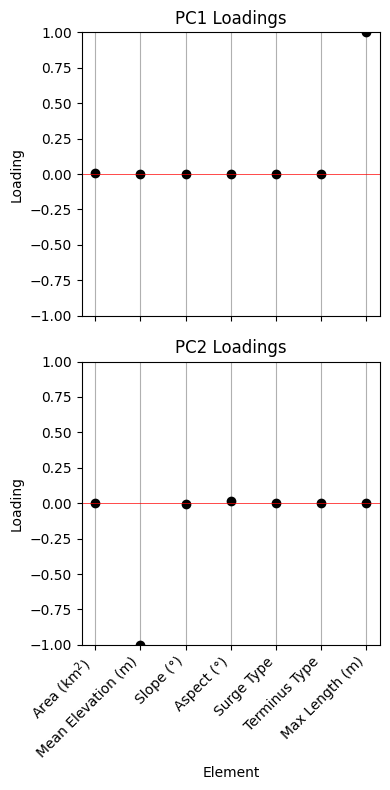

In [11]:
# Why don't we visualize these loadings?
fig, axes = plt.subplots(2, 1, figsize=(4, 8), sharex=True)
x = np.arange(len(glacier_centered.columns))
latex_cols = [latex_labels[col] for col in glacier_centered.columns]

# PC1 loadings
ax1 = axes[0]
ax1.scatter(x, loadings['PC1'], color='black')
ax1.set_ylabel('Loading')
ax1.axhline(y=0, color='r', linestyle='-', linewidth=0.5)
ax1.set_ylim(-1, 1)
ax1.grid(True, axis='x')
ax1.set_axisbelow(True)
ax1.set_title('PC1 Loadings')

# PC2 loadings
ax2 = axes[1]
ax2.scatter(x, loadings['PC2'], color='black')
ax2.set_ylabel('Loading')
ax2.set_xlabel('Element')
ax2.set_xticks(x)
ax2.set_xticklabels(latex_cols, rotation=45, ha='right')
ax2.axhline(y=0, color='r', linestyle='-', linewidth=0.5)
ax2.set_ylim(-1, 1)
ax2.grid(True, axis='x')
ax2.set_axisbelow(True)
ax2.set_title('PC2 Loadings')

plt.tight_layout()
plt.show()

## Biplot


Visualization of the PCA results, notice the diferent scales btween axis 

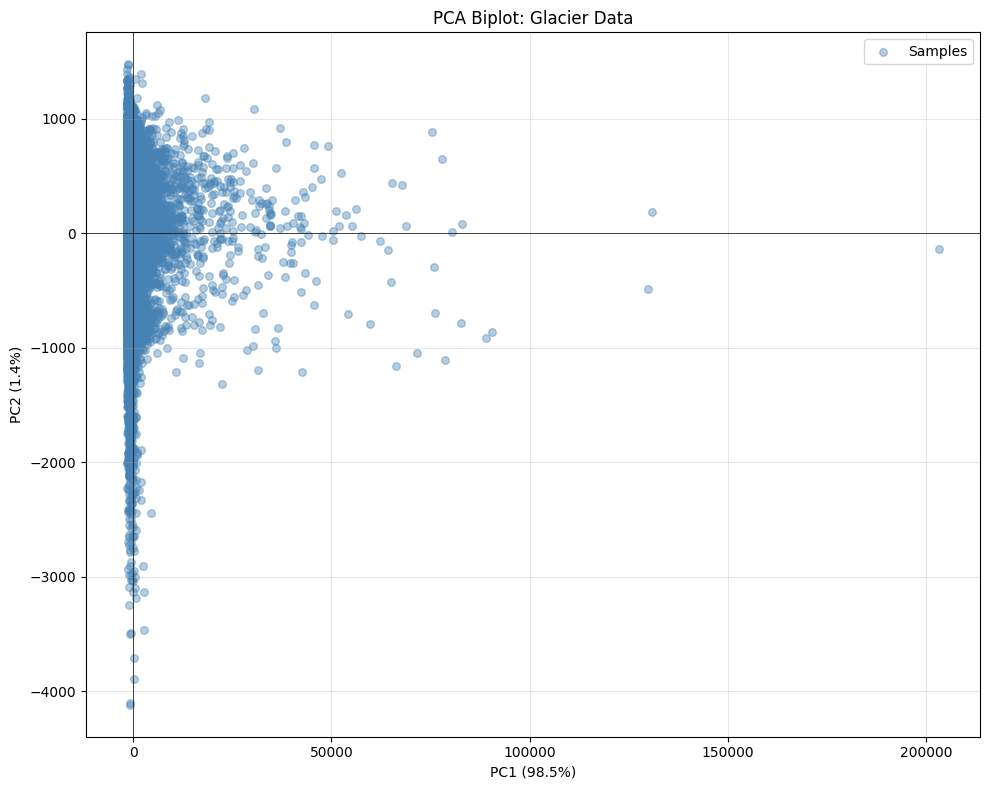

In [13]:
# Create a biplot combining scores and loadings
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the scores (data points)
ax.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.4, color='steelblue', s=30, label='Samples')

ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}%)')
ax.set_title('PCA Biplot: Glacier Data')
ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()